# Example usage of Stokes Class

In [1]:
import numpy as np
import pybbtd.stokes as stokes
import pybbtd.btd as btd
import matplotlib.pyplot as plt
import pybbtd as pybbtd

In [2]:
# Create Stokes model
R = 3
L = 5
btd.validate_R_L(R, L)
X = stokes.Stokes([25, 25], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (25, 25, 4) on LL1 mode.


In [4]:
# Create ground truth tensor
[A0, B0, C0], T0 = X.generate_stokes_tensor()

In [14]:
theta = X.get_constraint_matrix()
Tnoisy = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 1e-2 * np.random.randn(*X.dims)

In [15]:
stokes.validate_stokes_tensor(Tnoisy)

All pixels satisfy the Stokes constraints.


In [16]:
np.random.seed(10)
X.fit(
    data=Tnoisy,
    algorithm="ADMM",
    init="random",
    max_iter=5000,
    rho=1,
    max_admm=1,
    rel_tol=10**-8,
    abs_tol=10**-14,
    admm_tol=10**-10,
)

Exiting early due to unsufficient decrease of cost


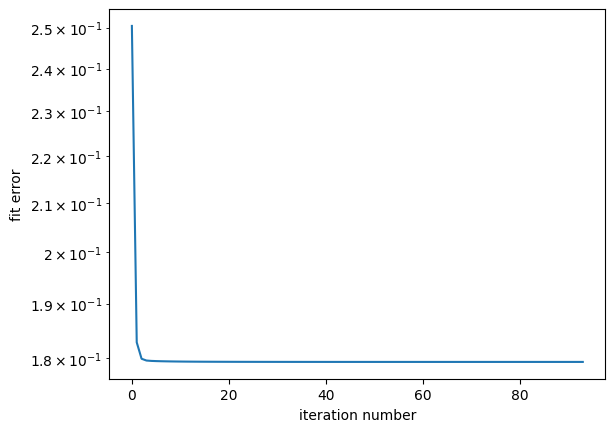

In [19]:
fig, ax = plt.subplots()
ax.semilogy(X.fit_error)
ax.set_ylabel("fit error")
_ = ax.set_xlabel("iteration number")

# Example with BBTD board

In [21]:
tensor = np.load("data/BBTD_Stokes.npy")

# Create Stokes model
R = 5
L = 25
btd.validate_R_L(R, L)
X = stokes.Stokes([tensor.shape[0], tensor.shape[1]], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (160, 160, 4) on LL1 mode.


In [22]:
X.fit(
    data=tensor,
    algorithm="ADMM",
    init="random",
    max_iter=5000,
    rho=1,
    max_admm=1,
    rel_tol=10**-8,
    abs_tol=10**-7,
    admm_tol=10**-5,
)

Progress: 20.0 %
Progress: 40.0 %
Progress: 60.0 %
Progress: 80.0 %
Exiting early due to unsufficient decrease of cost


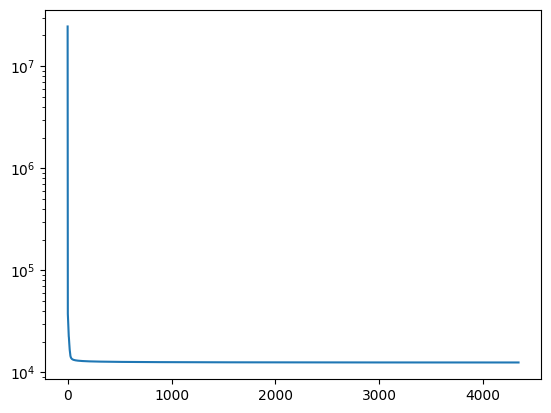

In [23]:
plt.semilogy(X.fit_error)

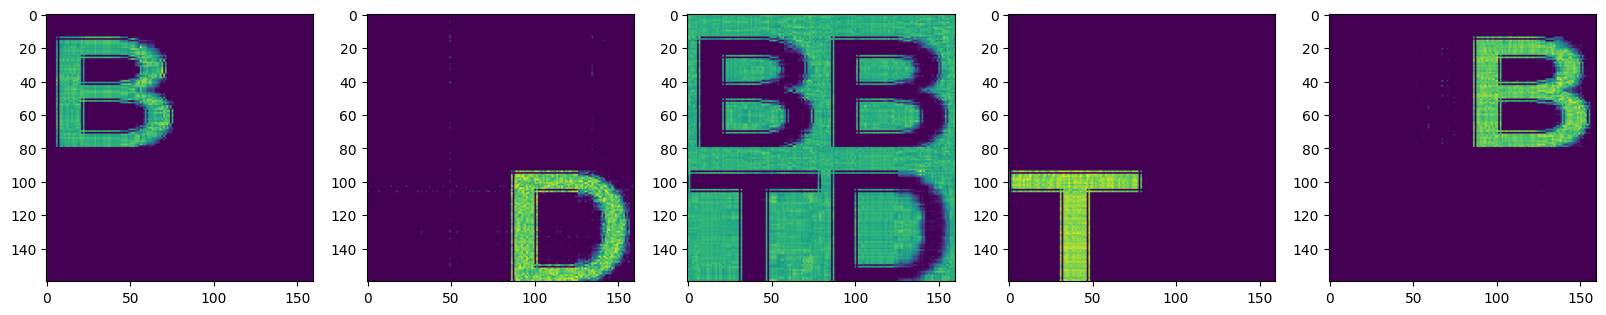

In [24]:
Afit, Bfit, Cfit = X.factors[0], X.factors[1], X.factors[2]


def plot_Stokes_terms(outA, outB, R, L):
    fig, axes = plt.subplots(1, R, figsize=(4 * R, 4))
    result = np.zeros((R, outA.shape[0], outB.shape[0]))

    for r in range(R):
        result[r] = outA[:, r * L : (r + 1) * L] @ outB[:, r * L : (r + 1) * L].T
        axes[r].imshow(result[r], cmap="viridis")


plot_Stokes_terms(Afit, Bfit, R, L)